# 0. 환경 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
from IPython.display import Image
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/content/drive/My Drive/프로젝트/데이콘-직업/data')

# 1. 데이터 불러오기

In [4]:
know_2020=pd.read_csv('./train/KNOW_2020.csv',na_values=' ')
know_2020.head()

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,saq5_2,saq6_1,saq6_2,saq7_1,saq7_2,saq8_1,saq8_2,saq9_1,saq9_2,saq10_1,saq10_2,saq11_1,saq11_2,saq12_1,saq12_2,saq13_1,saq13_2,saq14_1,saq14_2,saq15_1,saq15_2,saq16_1,saq16_2,saq17_1,saq17_2,saq18_1,saq18_2,saq19_1,saq19_2,saq20_1,...,bq16_10,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq21_4,bq22_1,bq22_2,bq22_3,bq22_4,bq22_5,bq22_6,bq23_1,bq23_2,bq23_3,bq24,bq25,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,27127,4,4.0,4,4.0,4,5.0,4,5.0,3,3.0,4,5.0,1,NaN,4,5.0,3,4.0,1,NaN,3,4.0,3,4.0,4,5.0,3,4.0,4,5.0,3,4.0,3,4.0,1,NaN,1,NaN,4,...,4,4,2,2,2,2,2,2,2,2,2,NaN,1,3,일정하게 인원이 정해져 있으므로 일자리 변화는 없을 것 같아서,3,2,3,2,5,7,4,5,2,3,3,4,3,2,42,4,간호학,1,1,1.0,40,4000.0,2600.0,NaN,304003
1,27128,5,6.0,5,6.0,4,5.0,4,5.0,4,5.0,4,5.0,5,6.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,4,5.0,3,4.0,4,...,4,3,2,2,2,2,2,2,2,2,2,NaN,1,2,경기 침체,3,3,3,2,3,4,3,5,6,6,3,6,5,1,45,4,기계공학,1,1,1.0,40,4000.0,3000.0,NaN,221401
2,27129,3,4.0,3,4.0,3,4.0,3,5.0,3,5.0,3,5.0,3,5.0,4,5.0,4,5.0,4,5.0,3,4.0,3,4.0,3,4.0,4,5.0,4,4.0,4,5.0,3,4.0,4,5.0,4,5.0,3,...,4,3,2,2,1,1,2,2,2,2,2,"새로운 장비, 기술 도입됨",2,2,전체적으로 경기 악화 때문,3,2,3,2,5,7,5,5,5,5,5,5,5,1,38,4,기계,1,1,1.0,48,4300.0,3000.0,NaN,815001
3,27130,4,5.0,2,3.0,3,3.0,4,5.0,3,4.0,3,5.0,4,4.0,3,3.0,3,2.0,1,NaN,2,3.0,3,4.0,3,5.0,3,2.0,3,3.0,4,4.0,3,4.0,1,NaN,5,6.0,3,...,2,2,2,2,2,2,2,2,2,2,2,NaN,1,3,사람의 상태를 소통하며 확인해서 그에 맞는 각가의 처방을 내려줘야 하는 일이라 대체불가,3,3,3,2,6,4,7,3,6,7,7,6,4,2,25,4,보건학,1,1,1.0,40,3500.0,3300.0,NaN,304003
4,27131,5,6.0,4,5.0,3,5.0,4,4.0,4,6.0,4,5.0,4,5.0,5,6.0,4,5.0,4,5.0,4,5.0,4,5.0,5,6.0,4,5.0,1,NaN,1,NaN,4,5.0,4,5.0,4,5.0,5,...,5,4,2,2,2,2,2,2,2,2,2,NaN,2,2,건설경기가 아직은 침체에서 일어나기 힘들 것 같다,2,2,3,2,8,8,7,5,3,6,6,2,1,1,49,4,건축설비공학,1,1,1.0,40,5700.0,2700.0,NaN,140201


In [5]:
know_2020_test=pd.read_csv('./test/KNOW_2020_test.csv',na_values=' ')
know_2020_test.head()

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,saq5_2,saq6_1,saq6_2,saq7_1,saq7_2,saq8_1,saq8_2,saq9_1,saq9_2,saq10_1,saq10_2,saq11_1,saq11_2,saq12_1,saq12_2,saq13_1,saq13_2,saq14_1,saq14_2,saq15_1,saq15_2,saq16_1,saq16_2,saq17_1,saq17_2,saq18_1,saq18_2,saq19_1,saq19_2,saq20_1,...,bq16_9,bq16_10,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq21_4,bq22_1,bq22_2,bq22_3,bq22_4,bq22_5,bq22_6,bq23_1,bq23_2,bq23_3,bq24,bq25,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3
0,27127,3,4.0,3,4.0,4,5.0,1,NaN,1,NaN,1,NaN,2,3.0,1,NaN,3,5.0,1,NaN,1,NaN,1,NaN,3,4.0,3,5.0,5,5.0,4,2.0,1,NaN,1,NaN,4,5.0,4,...,5,4,5,2,2,2,2,2,2,2,2,2,NaN,2,4,고령화로 간호 필요한 사람 증가,3,3,3,2,8,7,9,3,4,3,7,9,8,2,27,2,문과,1,1,1.0,40,2300.0,2000.0,NaN
1,27128,4,5.0,4,5.0,4,5.0,3,4.0,4,6.0,4,5.0,3,3.0,3,4.0,4,4.0,4,5.0,3,4.0,3,5.0,5,5.0,4,5.0,4,5.0,4,6.0,4,5.0,4,5.0,4,4.0,3,...,4,3,3,2,2,2,2,2,2,2,2,2,NaN,1,3,4차산업에 별영향을 못받는 직업이라서,3,3,3,2,5,5,5,4,5,5,5,4,5,1,58,4,한약학,2,5,1.0,40,NaN,NaN,5800.0
2,27129,4,6.0,4,5.0,4,7.0,2,4.0,1,NaN,2,4.0,1,NaN,2,3.0,3,5.0,1,NaN,3,5.0,1,NaN,2,3.0,1,NaN,1,NaN,1,NaN,2,3.0,1,NaN,1,NaN,1,...,3,4,5,2,2,2,2,2,2,2,2,2,NaN,2,3,우리 사회에 필요한 직업이다,3,3,3,2,6,5,3,4,3,3,5,5,5,1,38,4,신문방송학,1,1,1.0,48,4700.0,3400.0,NaN
3,27130,3,4.0,3,4.0,3,3.0,1,NaN,2,3.0,2,4.0,2,4.0,2,5.0,2,3.0,2,4.0,2,4.0,2,3.0,2,3.0,2,3.0,1,NaN,2,4.0,1,NaN,1,NaN,1,NaN,1,...,2,3,4,2,2,2,2,2,2,2,2,2,NaN,2,3,대체 에너지의 요구로 유지됨,3,3,3,2,4,6,4,7,6,8,4,7,6,1,39,5,임학,1,1,1.0,40,4900.0,4500.0,NaN
4,27131,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,3,3.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,4.0,4,...,2,4,3,2,2,2,2,2,2,2,2,2,NaN,2,4,요즘 사회불안요소 때문에 청원경찰 고용이 늘어날것이다,3,3,3,2,7,5,3,7,4,3,5,7,7,1,41,2,인문계,1,1,1.0,40,3200.0,2400.0,NaN


# 2. EDA

## 데이터 type 분포

In [6]:
print('학습용 데이터 type 분포')
know_2020[know_2020.columns[1:]].dtypes.value_counts()

학습용 데이터 type 분포


int64      128
float64     49
object       7
dtype: int64

In [7]:
print('평가용 데이터 type 분포')
know_2020_test[know_2020_test.columns[1:]].dtypes.value_counts() #label 컬럼이 하나 없다.

평가용 데이터 type 분포


int64      127
float64     49
object       7
dtype: int64

## Target Column - knowcode 파악

In [8]:
print("데이터 target column(상위 5개) 분포")
print(know_2020['knowcode'].value_counts()[:5])

데이터 target column(상위 5개) 분포
140101    22
240101    18
416203    18
25401     18
306903    18
Name: knowcode, dtype: int64


140101 : 건축가

240101 : 경찰관

416203 : 연극 및 뮤지컬 배우

25401 : 일반행정공무원

306903 : 놀이치료사

In [9]:
job_top5=['140101','240101','416203','25401','306903']

Text(0, 0.5, 'Count')

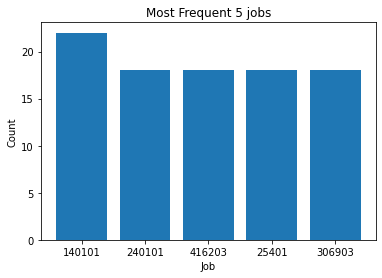

In [10]:
plt.bar(job_top5,know_2020['knowcode'].value_counts()[:5])
plt.title('Most Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

In [11]:
print("데이터 target column(하위 5개) 분포")
print(know_2020['knowcode'].value_counts()[-5:])

데이터 target column(하위 5개) 분포
417201    15
122301    15
411102    15
884201    15
813101    15
Name: knowcode, dtype: int64


417201 : 연예인 매니저

122301 : 농림어업 시험원

411102 : 소설가

884201 : 귀금속, 보석 제공원

813101 : 금형원

In [12]:
job_low5=['417201','122301','411102','884201','813101']

Text(0, 0.5, 'Count')

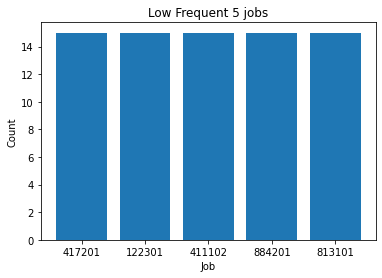

In [13]:
plt.bar(job_low5,know_2020['knowcode'].value_counts()[-5:])
plt.title('Low Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

## saq 간 상관관계

In [14]:
columns=know_2020.columns[1:-1][:86]
columns

Index(['saq1_1', 'saq1_2', 'saq2_1', 'saq2_2', 'saq3_1', 'saq3_2', 'saq4_1',
       'saq4_2', 'saq5_1', 'saq5_2', 'saq6_1', 'saq6_2', 'saq7_1', 'saq7_2',
       'saq8_1', 'saq8_2', 'saq9_1', 'saq9_2', 'saq10_1', 'saq10_2', 'saq11_1',
       'saq11_2', 'saq12_1', 'saq12_2', 'saq13_1', 'saq13_2', 'saq14_1',
       'saq14_2', 'saq15_1', 'saq15_2', 'saq16_1', 'saq16_2', 'saq17_1',
       'saq17_2', 'saq18_1', 'saq18_2', 'saq19_1', 'saq19_2', 'saq20_1',
       'saq20_2', 'saq21_1', 'saq21_2', 'saq22_1', 'saq22_2', 'saq23_1',
       'saq23_2', 'saq24_1', 'saq24_2', 'saq25_1', 'saq25_2', 'saq26_1',
       'saq26_2', 'saq27_1', 'saq27_2', 'saq28_1', 'saq28_2', 'saq29_1',
       'saq29_2', 'saq30_1', 'saq30_2', 'saq31_1', 'saq31_2', 'saq32_1',
       'saq32_2', 'saq33_1', 'saq33_2', 'saq34_1', 'saq34_2', 'saq35_1',
       'saq35_2', 'saq36_1', 'saq36_2', 'saq37_1', 'saq37_2', 'saq38_1',
       'saq38_2', 'saq39_1', 'saq39_2', 'saq40_1', 'saq40_2', 'saq41_1',
       'saq41_2', 'saq42_1', 'saq42_

In [15]:
columns=columns[range(0,86,2)]
columns

Index(['saq1_1', 'saq2_1', 'saq3_1', 'saq4_1', 'saq5_1', 'saq6_1', 'saq7_1',
       'saq8_1', 'saq9_1', 'saq10_1', 'saq11_1', 'saq12_1', 'saq13_1',
       'saq14_1', 'saq15_1', 'saq16_1', 'saq17_1', 'saq18_1', 'saq19_1',
       'saq20_1', 'saq21_1', 'saq22_1', 'saq23_1', 'saq24_1', 'saq25_1',
       'saq26_1', 'saq27_1', 'saq28_1', 'saq29_1', 'saq30_1', 'saq31_1',
       'saq32_1', 'saq33_1', 'saq34_1', 'saq35_1', 'saq36_1', 'saq37_1',
       'saq38_1', 'saq39_1', 'saq40_1', 'saq41_1', 'saq42_1', 'saq43_1'],
      dtype='object')

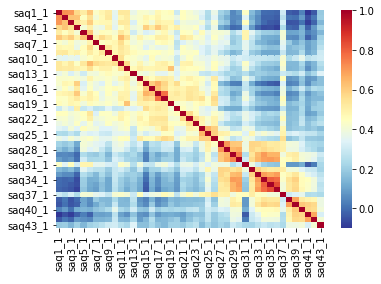

In [16]:
sns.heatmap(know_2020[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## kq간 상관관계

In [17]:
columns=know_2020.columns[1:-1][86:101]
columns

Index(['saq44_1', 'saq44_2', 'vq1', 'vq2', 'vq3', 'vq4', 'vq5', 'vq6', 'vq7',
       'vq8', 'vq9', 'vq10', 'vq11', 'vq12', 'vq13'],
      dtype='object')

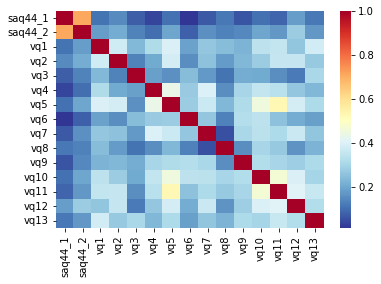

In [18]:
sns.heatmap(know_2020[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## 산업 유형 (bq1)

In [19]:
know_2020['bq1'].value_counts()

3     1371
13     875
18     770
15     727
17     702
6      583
19     529
16     432
10     392
7      338
8      328
11     309
9      222
14     183
4      139
1      132
5       41
20      20
12      14
2       14
21       1
Name: bq1, dtype: int64

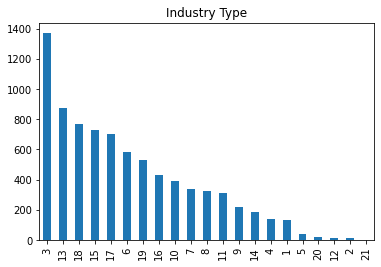

In [20]:
know_2020['bq1'].value_counts().plot.bar(title='Industry Type')

산업 유형이 3인 사람들의 직업 코드의 분포를 보겠다.

In [21]:
know_2020[know_2020['bq1']==3]['knowcode'].value_counts()[:10]

28401     17
835101    16
823301    15
817301    15
821101    15
861301    15
822301    15
861201    15
816103    15
882301    15
Name: knowcode, dtype: int64

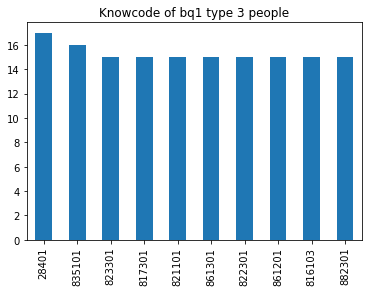

In [22]:
know_2020[know_2020['bq1']==3]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 3 people')

산업 유형이 13인 사람들의 직업 코드의 분포를 보겠다.

In [23]:
know_2020[know_2020['bq1']==13]['knowcode'].value_counts()[:10]

159103    15
221201    15
415504    15
29303     14
155304    14
155305    13
222001    13
23101     12
23201     12
411201    12
Name: knowcode, dtype: int64

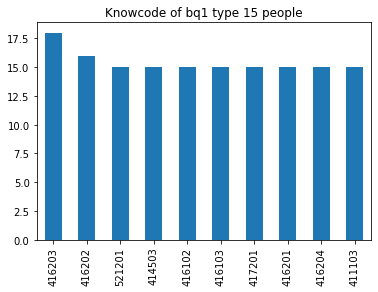

In [24]:
know_2020[know_2020['bq1']==18]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 15 people')

산업 유형이 18인 사람들의 직업 코드의 분포를 보겠다.

In [25]:
know_2020[know_2020['bq1']==18]['knowcode'].value_counts()[:10]

416203    18
416202    16
521201    15
414503    15
416102    15
416103    15
417201    15
416201    15
416204    15
411103    15
Name: knowcode, dtype: int64

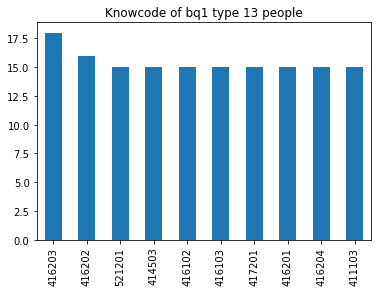

In [26]:
know_2020[know_2020['bq1']==18]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 13 people')

bq1의 유형과 직업코드를 비교하여 보았을 때 꽤 큰 관련이 있다고 보기 애매했다.

type 3인 경우엔 88으로 시작하는 직업 코드가 많았고

type 15인 경우엔 41,

type 18인 경우엔 41로 시작하는 직업 코드가 많았다.

## 근무업체 유형(bq2)

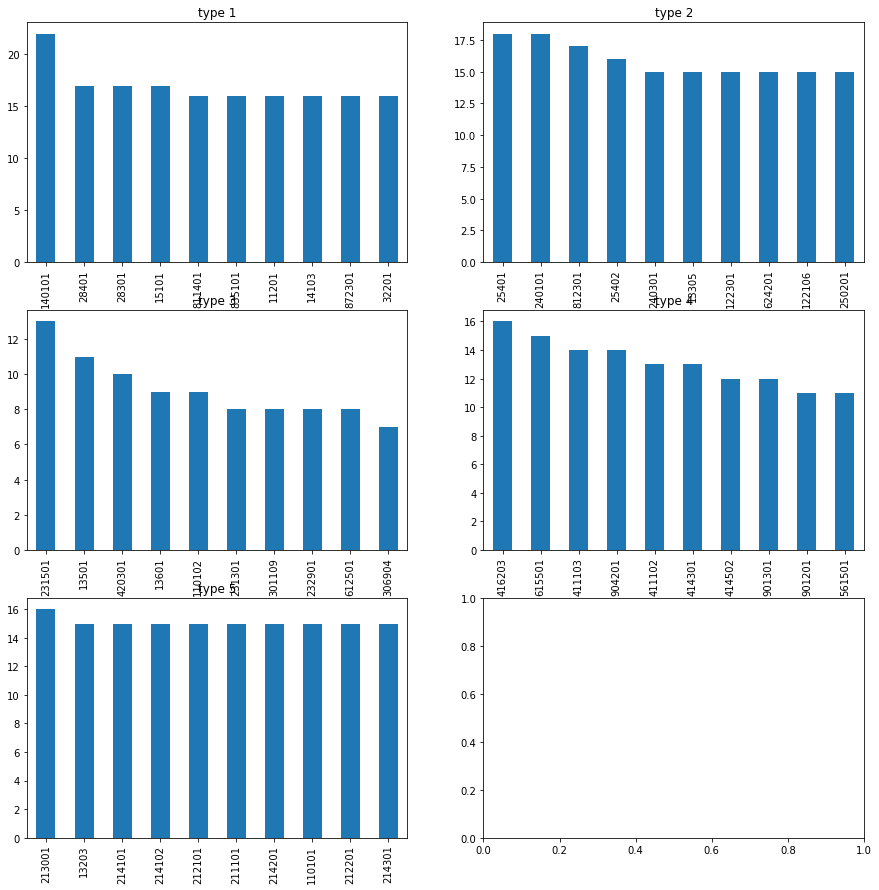

In [27]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/2)
  col=i%2
  know_2020[know_2020['bq2']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 유형에 따라서도 knowcode의 경향은 많이 달라지는 걸 확인할 수 있다.

## 근무업체 규모(bq3)

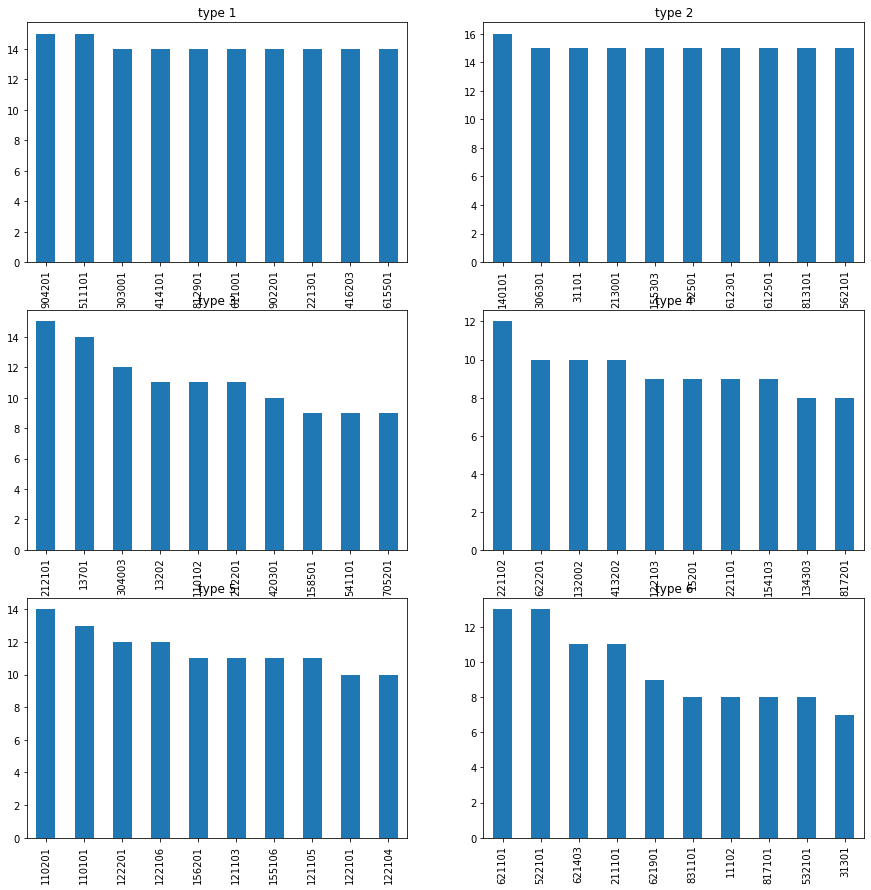

In [28]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/2)
  col=i%2
  know_2020[know_2020['bq3']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 요구훈련 기간(bq5_1)

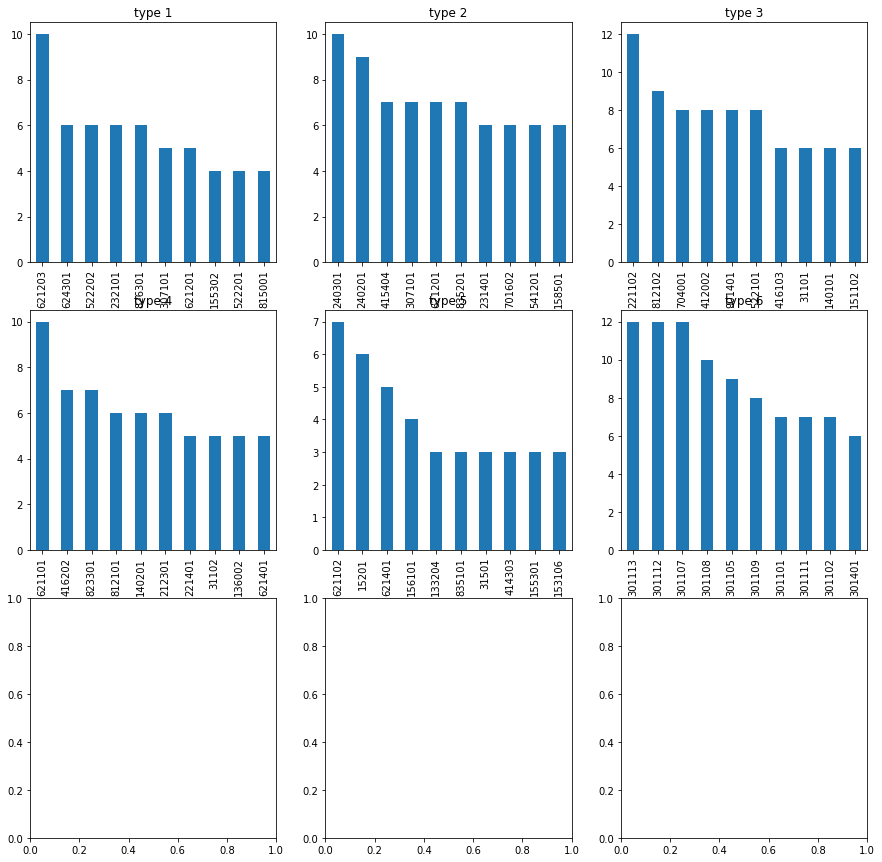

In [29]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq5_1']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 교육수준 (bq 7)

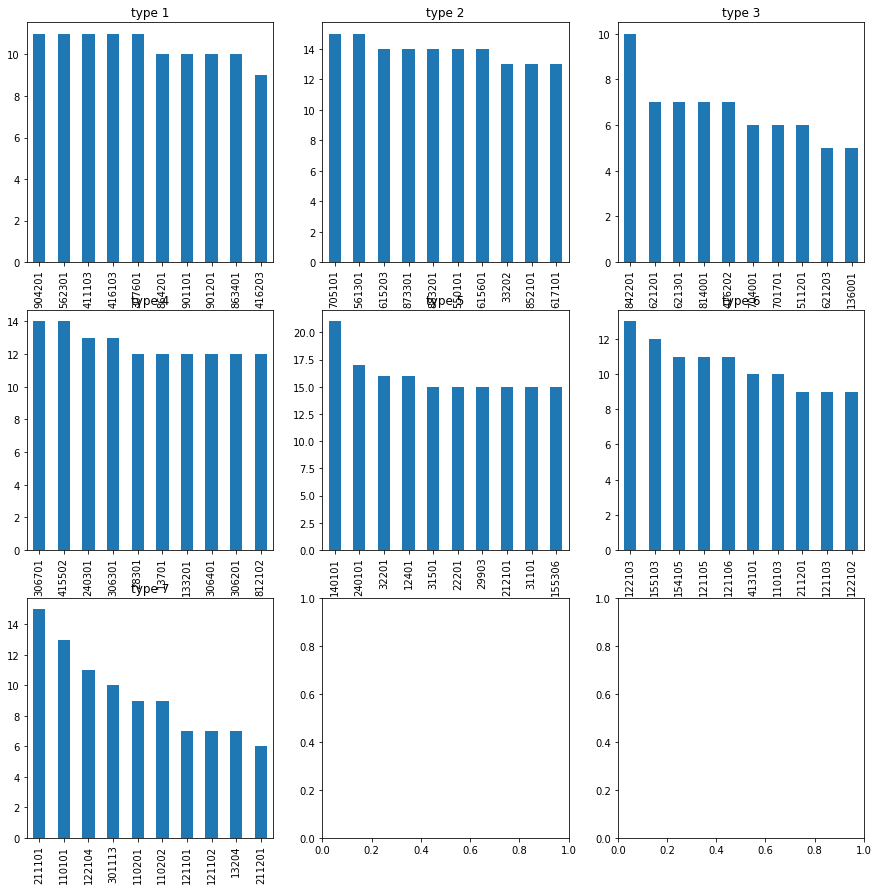

In [30]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,8)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq7']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 직업 안정성(bq 9) 

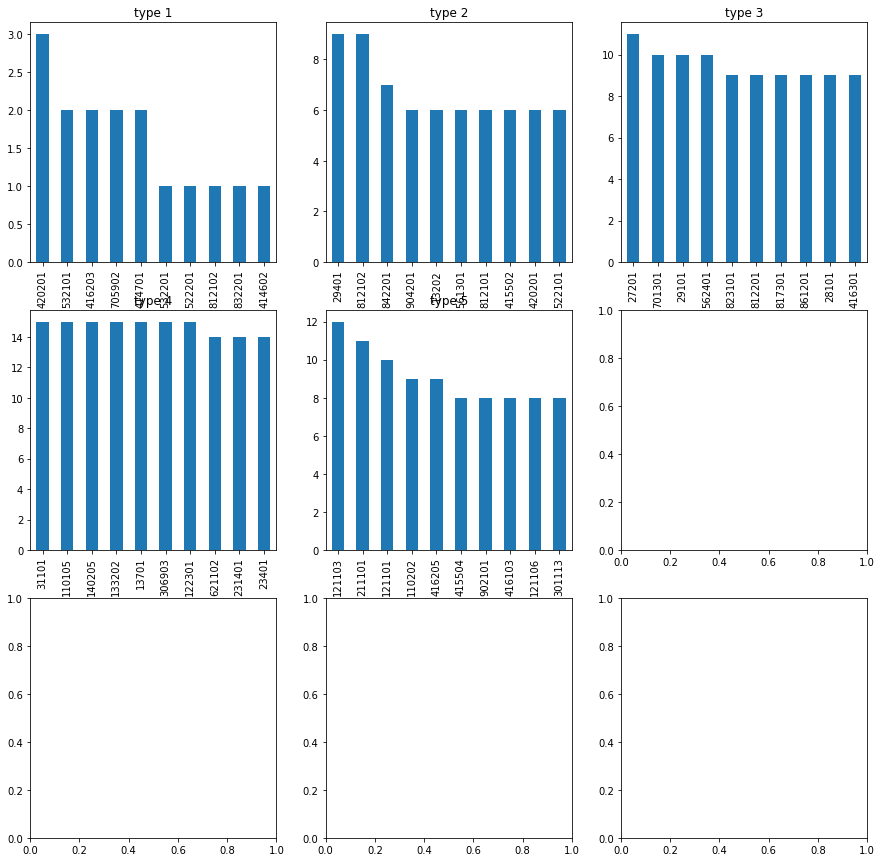

In [31]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq9']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 근무조건 (bq 11)

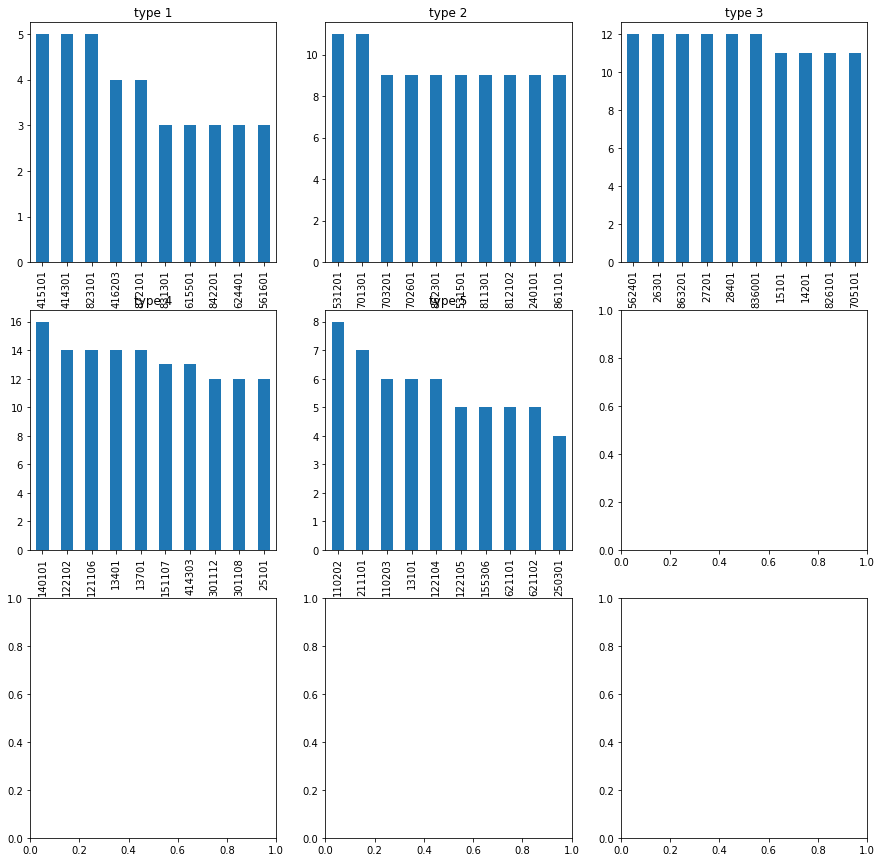

In [32]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq11']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 향후 일자리 변화(bq 20)

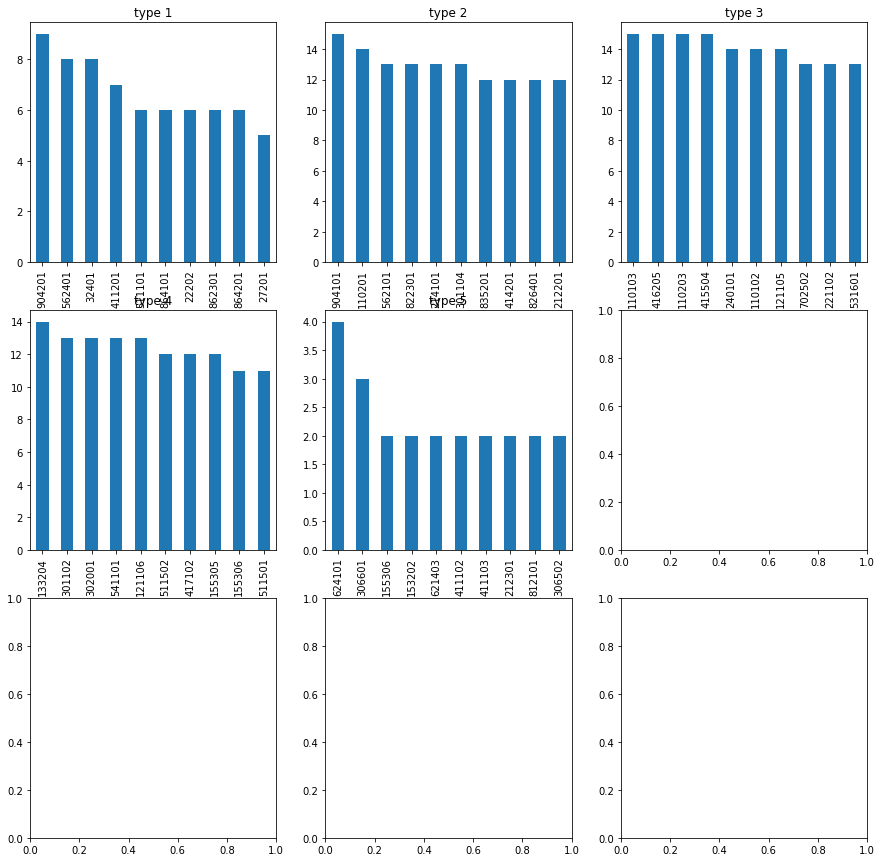

In [33]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq20']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 최종학력(bq 26)

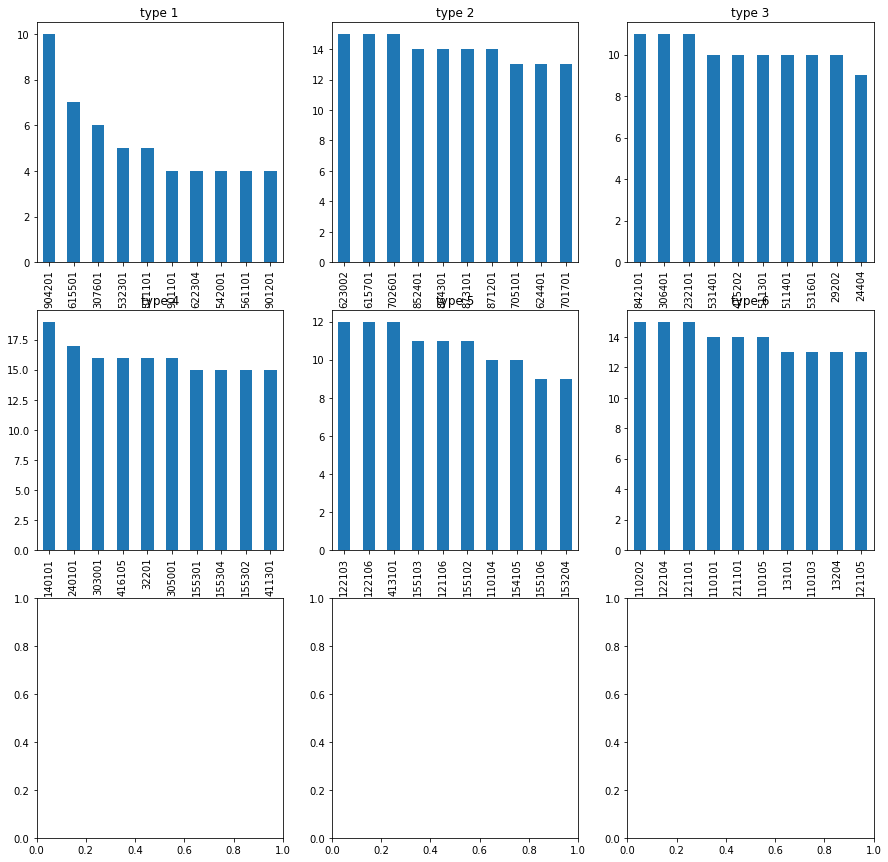

In [34]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq26']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 계약형태 (bq 28)

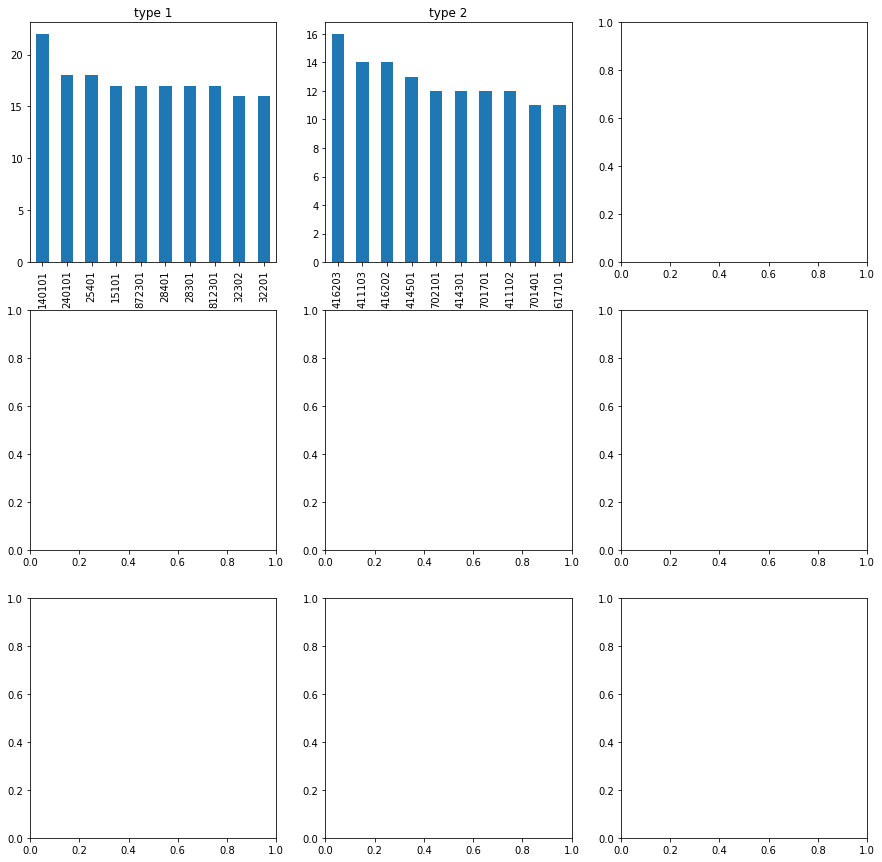

In [35]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,3)):
  row=int(i/3)
  col=i%3
  know_2020[know_2020['bq28']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

# 3. 데이터 파악하기

## 3.1 결측치 파악

In [36]:
for index, value, tindex, tvalue in zip(know_2020.isnull().sum().index, know_2020.isnull().sum(), know_2020_test.isnull().sum().index, know_2020_test.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
saq1_1 : 0 / saq1_1 : 0 / 0
saq1_2 : 676 / saq1_2 : 683 / 1359
saq2_1 : 0 / saq2_1 : 0 / 0
saq2_2 : 457 / saq2_2 : 456 / 913
saq3_1 : 0 / saq3_1 : 0 / 0
saq3_2 : 1606 / saq3_2 : 1618 / 3224
saq4_1 : 0 / saq4_1 : 0 / 0
saq4_2 : 836 / saq4_2 : 890 / 1726
saq5_1 : 0 / saq5_1 : 0 / 0
saq5_2 : 1705 / saq5_2 : 1689 / 3394
saq6_1 : 0 / saq6_1 : 0 / 0
saq6_2 : 1312 / saq6_2 : 1342 / 2654
saq7_1 : 0 / saq7_1 : 0 / 0
saq7_2 : 2175 / saq7_2 : 2148 / 4323
saq8_1 : 0 / saq8_1 : 0 / 0
saq8_2 : 845 / saq8_2 : 873 / 1718
saq9_1 : 0 / saq9_1 : 0 / 0
saq9_2 : 531 / saq9_2 : 595 / 1126
saq10_1 : 0 / saq10_1 : 0 / 0
saq10_2 : 1546 / saq10_2 : 1554 / 3100
saq11_1 : 0 / saq11_1 : 0 / 0
saq11_2 : 1821 / saq11_2 : 1786 / 3607
saq12_1 : 0 / saq12_1 : 0 / 0
saq12_2 : 1297 / saq12_2 : 1353 / 2650
saq13_1 : 0 / saq13_1 : 0 / 0
saq13_2 : 515 / saq13_2 : 537 / 1052
saq14_1 : 0 / saq14_1 : 0 / 0
saq14_2 : 1490 / saq14_2 : 1506 / 2996
saq15_1 : 0 / saq15_1 : 0 / 0
saq15_2 : 1378 / saq15_2 : 1384

## 3.2 결측치 처리

### saqn_2

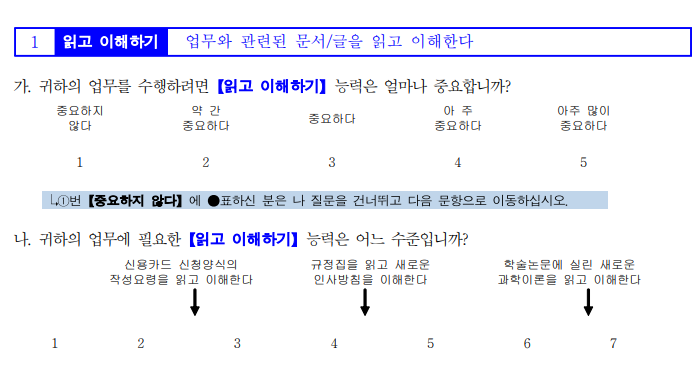

In [37]:
Image('./image/2020saq.PNG')

saqn_2는 가에서 중요하지 않다고 체크한 사람들이 skip한 것을 보인다.

In [38]:
columns=know_2020.columns[1:-1][:88]
columns

Index(['saq1_1', 'saq1_2', 'saq2_1', 'saq2_2', 'saq3_1', 'saq3_2', 'saq4_1',
       'saq4_2', 'saq5_1', 'saq5_2', 'saq6_1', 'saq6_2', 'saq7_1', 'saq7_2',
       'saq8_1', 'saq8_2', 'saq9_1', 'saq9_2', 'saq10_1', 'saq10_2', 'saq11_1',
       'saq11_2', 'saq12_1', 'saq12_2', 'saq13_1', 'saq13_2', 'saq14_1',
       'saq14_2', 'saq15_1', 'saq15_2', 'saq16_1', 'saq16_2', 'saq17_1',
       'saq17_2', 'saq18_1', 'saq18_2', 'saq19_1', 'saq19_2', 'saq20_1',
       'saq20_2', 'saq21_1', 'saq21_2', 'saq22_1', 'saq22_2', 'saq23_1',
       'saq23_2', 'saq24_1', 'saq24_2', 'saq25_1', 'saq25_2', 'saq26_1',
       'saq26_2', 'saq27_1', 'saq27_2', 'saq28_1', 'saq28_2', 'saq29_1',
       'saq29_2', 'saq30_1', 'saq30_2', 'saq31_1', 'saq31_2', 'saq32_1',
       'saq32_2', 'saq33_1', 'saq33_2', 'saq34_1', 'saq34_2', 'saq35_1',
       'saq35_2', 'saq36_1', 'saq36_2', 'saq37_1', 'saq37_2', 'saq38_1',
       'saq38_2', 'saq39_1', 'saq39_2', 'saq40_1', 'saq40_2', 'saq41_1',
       'saq41_2', 'saq42_1', 'saq42_

In [39]:
for index in range(0,88,2):
  col=columns[index]
  before=col
  after = col[:-1] + str((int(col[-1])+1))
  print(before, after)
  know_2020.loc[(know_2020[after].isnull()) & (know_2020[before].notnull()) & (know_2020[before] == (sorted(know_2020[before].unique()))[0]), after] = 0
  know_2020_test.loc[(know_2020_test[after].isnull()) & (know_2020_test[before].notnull()) & (know_2020_test[before] == (sorted(know_2020_test[before].unique()))[0]), after] = 0

saq1_1 saq1_2
saq2_1 saq2_2
saq3_1 saq3_2
saq4_1 saq4_2
saq5_1 saq5_2
saq6_1 saq6_2
saq7_1 saq7_2
saq8_1 saq8_2
saq9_1 saq9_2
saq10_1 saq10_2
saq11_1 saq11_2
saq12_1 saq12_2
saq13_1 saq13_2
saq14_1 saq14_2
saq15_1 saq15_2
saq16_1 saq16_2
saq17_1 saq17_2
saq18_1 saq18_2
saq19_1 saq19_2
saq20_1 saq20_2
saq21_1 saq21_2
saq22_1 saq22_2
saq23_1 saq23_2
saq24_1 saq24_2
saq25_1 saq25_2
saq26_1 saq26_2
saq27_1 saq27_2
saq28_1 saq28_2
saq29_1 saq29_2
saq30_1 saq30_2
saq31_1 saq31_2
saq32_1 saq32_2
saq33_1 saq33_2
saq34_1 saq34_2
saq35_1 saq35_2
saq36_1 saq36_2
saq37_1 saq37_2
saq38_1 saq38_2
saq39_1 saq39_2
saq40_1 saq40_2
saq41_1 saq41_2
saq42_1 saq42_2
saq43_1 saq43_2
saq44_1 saq44_2


In [40]:
#그럼에도 불구하고 여전히 결측치인 칼럼들도 존재한다.
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2020.isnull().sum().index, know_2020.isnull().sum(), know_2020_test.isnull().sum().index, know_2020_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq18_10', 'bq26_1', 'bq28', 'bq30_1', 'bq30_2', 'bq30_3']
['saq40_2', 'bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq18_10', 'bq26_1', 'bq28', 'bq30_1', 'bq30_2', 'bq30_3']


In [41]:
for i in range(1,5):
  know_2020_test.loc[(know_2020_test['saq40_2'].isnull())&(know_2020_test['saq40_1']==i),'saq40_2']=know_2020[know_2020['saq40_1']==i]['saq40_2'].median()

In [42]:
know_2020_test.loc[know_2020_test['saq40_2'].isnull(),'saq40_2']=4

In [43]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2020.isnull().sum().index, know_2020.isnull().sum(), know_2020_test.isnull().sum().index, know_2020_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq18_10', 'bq26_1', 'bq28', 'bq30_1', 'bq30_2', 'bq30_3']
['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_1', 'bq5_2', 'bq18_10', 'bq26_1', 'bq28', 'bq30_1', 'bq30_2', 'bq30_3']


### bq

#### bq4

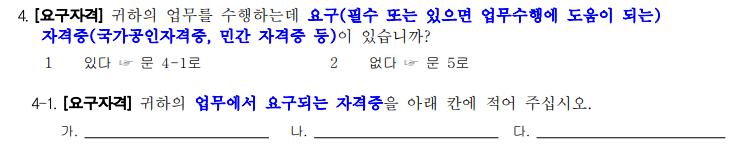

In [44]:
Image('./image/2020bq4.PNG')

4에서 없다고 선택한 사람들은 모두 '없음'으로 처리하겠다.

In [45]:
know_2020.loc[(know_2020['bq4'] == 2) & (know_2020['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2020_test.loc[(know_2020_test['bq4'] == 2) & (know_2020_test['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2020.loc[(know_2020['bq4'] == 2) & (know_2020['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2020_test.loc[(know_2020_test['bq4'] == 2) & (know_2020_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2020.loc[(know_2020['bq4'] == 2) & (know_2020['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2020_test.loc[(know_2020_test['bq4'] == 2) & (know_2020_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [46]:
print(len(know_2020.loc[(know_2020['bq4'] == 1) & (know_2020['bq4_1a'].isnull()), 'bq4_1a']),
len(know_2020_test.loc[(know_2020_test['bq4'] == 1) & (know_2020_test['bq4_1a'].isnull()), 'bq4_1a']))

0 0


1을 선택하였지만 두 번째, 세 번째를 비워둔 사람들은 자격증이 하나만 있다고 판단하여 없다고 입력하겠다.

In [47]:
know_2020.loc[(know_2020['bq4'] == 1) & (know_2020['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2020_test.loc[(know_2020_test['bq4'] == 1) & (know_2020_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2020.loc[(know_2020['bq4'] == 1) & (know_2020['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2020_test.loc[(know_2020_test['bq4'] == 1) & (know_2020_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [48]:
print(sum(know_2020['bq4_1a'].isnull()))
print(sum(know_2020['bq4_1b'].isnull()))
print(sum(know_2020['bq4_1c'].isnull()))
print(sum(know_2020_test['bq4_1a'].isnull()))
print(sum(know_2020_test['bq4_1b'].isnull()))
print(sum(know_2020_test['bq4_1c'].isnull()))

0
0
0
0
0
0


#### bq5

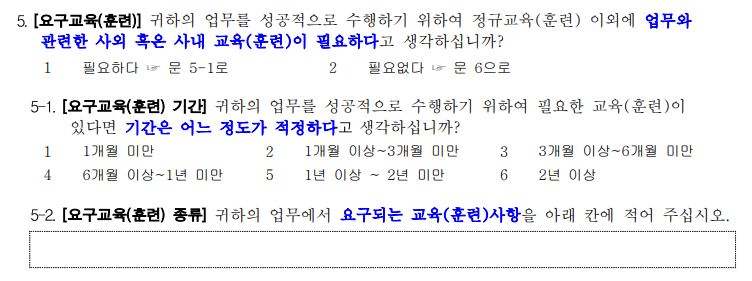

In [49]:
Image('./image/2020bq5.PNG')

필요없다고 생각한 사람들이 결측치로 남겨놨을 확률이 높으므로 5-1의 경우에는 0으로, 5-2는 없음으로 한다.

In [50]:
know_2020.loc[(know_2020['bq5_1'].isnull()), 'bq5_1'] = 0
know_2020_test.loc[(know_2020_test['bq5_1'].isnull()), 'bq5_1'] = 0
know_2020.loc[(know_2020['bq5_2'].isnull()), 'bq5_2'] = '없다'
know_2020_test.loc[(know_2020_test['bq5_2'].isnull()), 'bq5_2'] = '없다'

print(sum(know_2020['bq5_1'].isnull()))
print(sum(know_2020['bq5_2'].isnull()))
print(sum(know_2020_test['bq5_1'].isnull()))
print(sum(know_2020_test['bq5_2'].isnull()))

0
0
0
0


#### bq18_10

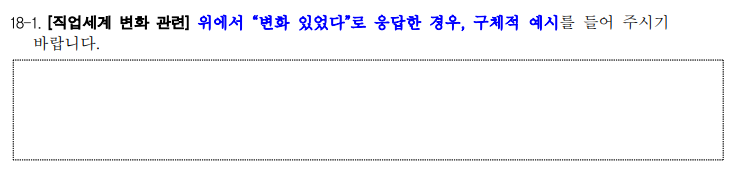

In [51]:
Image('./image/2020bq18_10.PNG')

In [52]:
#열을 탈락시키겠다.
know_2020 = know_2020.drop(columns = ['bq18_10'])
know_2020_test = know_2020_test.drop(columns = ['bq18_10'])

#### bq26_1

26-1. [전공] 귀하의 최종학력의 학과를 기입해 주십시오. 과
※ 최종학력이 실업계(전문계/특성화고/마이스터고) 고등학교인 경우에도 기재


중졸인 경우 공란으로 해놨을 수도 있으므로 26번에 1번을 택하고 26_1을 공란으로 둔 경우는 없음으로 넣고 나머지는 모름으로 넣자

In [53]:
know_2020.loc[(know_2020['bq26_1'].isnull())&(know_2020['bq26']==1),'bq26_1']='없다'
know_2020_test.loc[(know_2020_test['bq26_1'].isnull())&(know_2020_test['bq26']==1),'bq26_1']='없다'
know_2020.loc[(know_2020['bq26_1'].isnull())&(know_2020['bq26']!=1),'bq26_1']='모름'
know_2020_test.loc[(know_2020_test['bq26_1'].isnull())&(know_2020_test['bq26']!=1),'bq26_1']='모름'

In [54]:
print(sum(know_2020['bq26_1'].isnull()))
print(sum(know_2020_test['bq26_1'].isnull()))

0
0


In [55]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2020.isnull().sum().index, know_2020.isnull().sum(), know_2020_test.isnull().sum().index, know_2020_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq28', 'bq30_1', 'bq30_2', 'bq30_3']
['bq28', 'bq30_1', 'bq30_2', 'bq30_3']


#### bq28

28. [고용형태] 귀하의 직장에서 고용형태는 다음 중 어디에 해당합니까? 
1 정규직 2 비정규직

In [56]:
# 결측치 0으로 대체하겠다.
know_2020.loc[know_2020['bq28'].isnull(),'bq28']=0
know_2020_test.loc[know_2020_test['bq28'].isnull(),'bq28']=0

print(sum(know_2020['bq28'].isnull()))
print(sum(know_2020_test['bq28'].isnull()))

0
0


#### bq30_1 ~

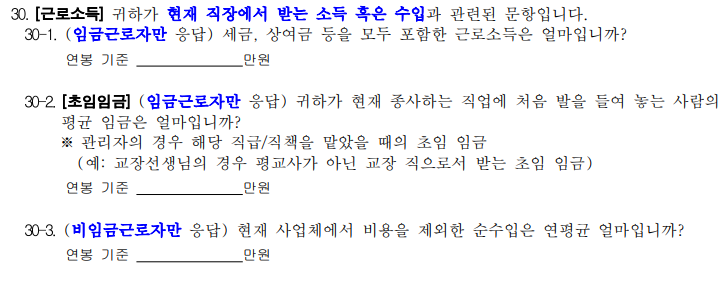

In [57]:
Image('./image/2020bq30.PNG')

In [58]:
know_2020 = know_2020.drop(columns = ['bq30_1', 'bq30_2', 'bq30_3'])
know_2020_test = know_2020_test.drop(columns = ['bq30_1', 'bq30_2', 'bq30_3'])

In [59]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2020.isnull().sum().index, know_2020.isnull().sum(), know_2020_test.isnull().sum().index, know_2020_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

[]
[]


### object들 labelencoder로 처리

In [60]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in know_2020.columns:
  if col == 'ID':
    continue
        
  try:
    know_2020[col] = know_2020[col].map(int)
  except:
    encoder = LabelEncoder()
    know_2020[col] = know_2020[col].map(str)
    know_2020[col] = encoder.fit_transform(know_2020[col])
    encoders[col] = encoder

In [61]:
for col in know_2020_test.columns:
  if col == 'ID':
    continue     
  try:
    know_2020_test[col] = know_2020_test[col].map(int)
  except:
    encoder = encoders[col]
    know_2020_test[col] = know_2020_test[col].map(str)
    category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
    know_2020_test[col] = know_2020_test[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리        

## 3.3 feature, label 구분

In [62]:
X_train=know_2020.drop(['idx','knowcode'],axis=1)
y_train=know_2020['knowcode']

In [63]:
X_test=know_2020_test.drop(['idx'],axis=1)

# 4. Modeling

In [64]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [65]:
model=CatBoostClassifier(iterations=2000,random_state=123)

model.fit(X_train,y_train)

Learning rate set to 0.049017
0:	learn: 6.2648369	total: 11.8s	remaining: 6h 31m 53s
1:	learn: 6.2376112	total: 23.4s	remaining: 6h 29m 48s
2:	learn: 6.2056058	total: 35s	remaining: 6h 28m 8s
3:	learn: 6.1763503	total: 46.4s	remaining: 6h 25m 43s
4:	learn: 6.1482078	total: 58s	remaining: 6h 25m 31s
5:	learn: 6.1273477	total: 1m 9s	remaining: 6h 25m 41s
6:	learn: 6.0990392	total: 1m 21s	remaining: 6h 25m 26s
7:	learn: 6.0607966	total: 1m 32s	remaining: 6h 24m 44s
8:	learn: 6.0271758	total: 1m 44s	remaining: 6h 24m 40s
9:	learn: 5.9934836	total: 1m 55s	remaining: 6h 24m 17s
10:	learn: 5.9597646	total: 2m 7s	remaining: 6h 23m 17s
11:	learn: 5.9228074	total: 2m 18s	remaining: 6h 23m 18s
12:	learn: 5.9006902	total: 2m 30s	remaining: 6h 23m 8s
13:	learn: 5.8787365	total: 2m 41s	remaining: 6h 22m 50s
14:	learn: 5.8501191	total: 2m 53s	remaining: 6h 22m 13s
15:	learn: 5.8174591	total: 3m 4s	remaining: 6h 22m 4s
16:	learn: 5.7916750	total: 3m 16s	remaining: 6h 21m 48s
17:	learn: 5.7642063	total

In [66]:
pred=model.predict(X_test)
pred

array([[307501],
       [303002],
       [412001],
       ...,
       [833001],
       [140101],
       [151105]])

In [67]:
pd.DataFrame(pred).to_csv('2020.csv',index=False)